<img src="http://imgur.com/1ZcRyrc.png" style="float: right; margin: 20px; height: 30px">

## PROJECT 4 - PART 2 & PART 3 - GA TRAINING


#### Group Members:
   #### 1. Nor Hamizah Binti Mustaffa
   #### 2. Normieza Binti Azhar
   #### 3. Wan Eizhan Afeef Bin Wan Ahmad Faizal

#### CONTENTS:

- [PROJECT 4 - PART 2 - GA TRAINING](#project-four-part-two)

    - [TITLE: EXPLORATORY DATA ANALYSIS](#title-eda)
    
        - [DATASET OVERVIEW](#dataset-overview)
        - [IMPORTING LIBRARIES/PACKAGES](#import-packages)
        - [DATA LOADING](#dataset-loading)
        - [DATA EXPLORING](#dataset-exploring)
        - [DATA VISUALIZATION](#dataset-visualisation)
        
        
        
        
    
    
- [PROJECT 4 - PART 3 - GA TRAINING](#project-four-part-three)
    - [TITLE: MACHINE LEARNING IN PREDICTING INSURANCE MEDICAL CHARGES](#title-ml)
        - [DATASET OVERVIEW](#dataset-overview2)
        - [BIAS AND VARIANCE](#bias-variance)
        - [EVALUATION PROCEDURE](#evaluation-procedure)
        - [DATA VISUALIZATION](#dataset-visualisation2)
        - [DISTRIBUTION OF INDEPENDENT VARIABLE](#distribution-iv)
        - [FINDING INDEPENDENT VARIABLE](#finding-iv)
        - [MACHINE LEARNING MODEL](#ml-model)
        - [LINEAR REGRESSION MODEL](#linreg-model)
        - [RANDOM FOREST MODEL](#forest-model)
    


<a id="project-four-part-two"></a>

## PROJECT 4 - PART 2 - GA TRAINING
<a id="title-eda"></a>
## TITLE: EXPLORATORY DATA ANALYSIS

<a id="dataset-overview"></a>
#### DATASET OVERVIEW

####  Domain : Health Insurance
####  Data Description : 
The data at hand contains medical costs of people characterized by certain attributes.
####  Attribute Information:

- age: Age of primary beneficiary

- sex: Insurance contractor gender, female / male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective

- index of body weight (kg /  m2 ) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoker / Non - smoker

- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance.

<a id="import-packages"></a>
#### IMPORTING LIBRARIES/PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<a id="dataset-loading"></a>
#### DATA LOADING

In [2]:
# Read data into a DataFrame.

# We use index_col to tell Pandas that the first column in the data has row labels.
data_ins = pd.read_csv('insurance.csv')
data_ins.head() 

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

<a id="dataset-exploring"></a>
#### DATA EXPLORING

In [3]:
#info about the data
data_ins.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- The data has 1338 rows including label with 7 features/columns/variables. 2 integer type, 2 float type and 3 object type(Strings in the column)

In [4]:
# Check for missing value in any colum
data_ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- The data has no missing values

In [5]:
# Check for missing value in any colum
data_ins.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

- The data has no missing values

In [6]:
# Print the dataframes
data_ins

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [7]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
data_ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# Print the first 10 rows.
data_ins.head(10)  

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

In [9]:
# Print the last five rows.
data_ins.tail()            

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [10]:
# The row index (aka "the row labels" — in this case integers)
data_ins.index 

RangeIndex(start=0, stop=1338, step=1)

In [11]:
# Column names (which is "an index")
data_ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# Number of rows and columns
data_ins.shape

(1338, 7)

In [13]:
# Describe all columns, including non-numeric.
data_ins.describe(include='all')

age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422265  
std     12110.011237  
min      1121.873900  
25%      4740.287150  
50%      9382.033000  
75%     16639.912515  
max     63770.428010

In [14]:
# five point summary of the continuous attributes
data_ins.describe()   

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

<a id="dataset-visualisation"></a>
#### DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

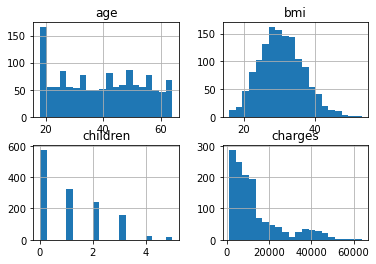

In [15]:
#visualize continouis variable/numerical variables.
data_ins.hist(bins=20)

In [16]:
#check the skewness of the continious variables that do not have normal distribution
# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data_ins.age),stats.skew(data_ins.bmi),stats.skew(data_ins.charges)]},
                        index=['age','bmi','charges']) 
Skewness

Skewness
age      0.055610
bmi      0.283729
charges  1.514180

#### SUMMARY: 
1. All 3 variables have positive skewness since the skewnes value is more than 0. 
2. The most positively skewed variable is charges followed by bmi and age.


In [17]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data_ins[x].min()
    x_max = data_ins[x].max()
    Q1 = data_ins[x].quantile(0.25)
    Q2 = data_ins[x].quantile(0.50)
    Q3 = data_ins[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data_ins[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data_ins[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data_ins[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data_ins[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 39.0
Q3                    : 51.0
Age(max) : 64


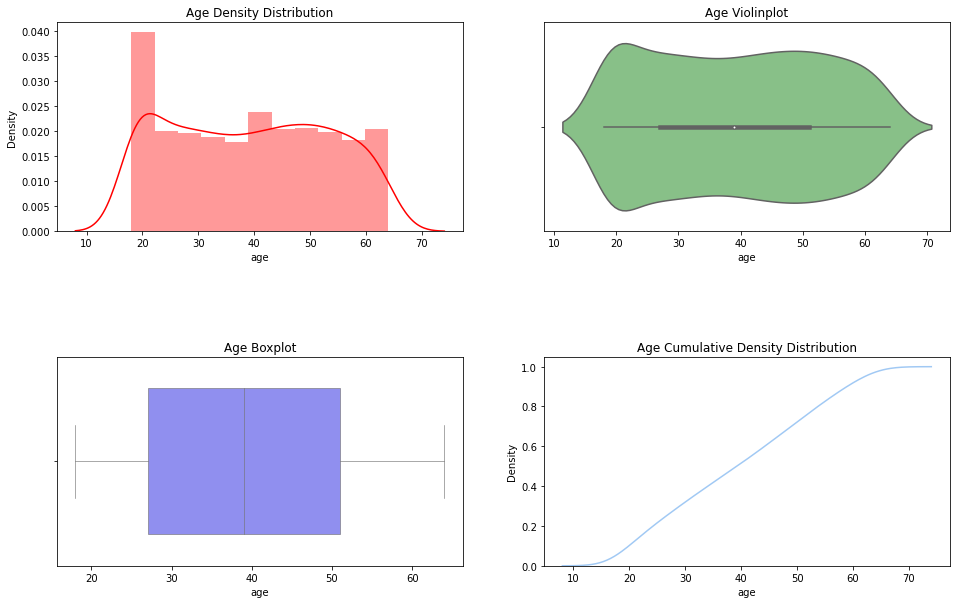

In [18]:
summary('age')

5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.29625
Q2(Median)            : 30.4
Q3                    : 34.69375
Bmi(max) : 53.13


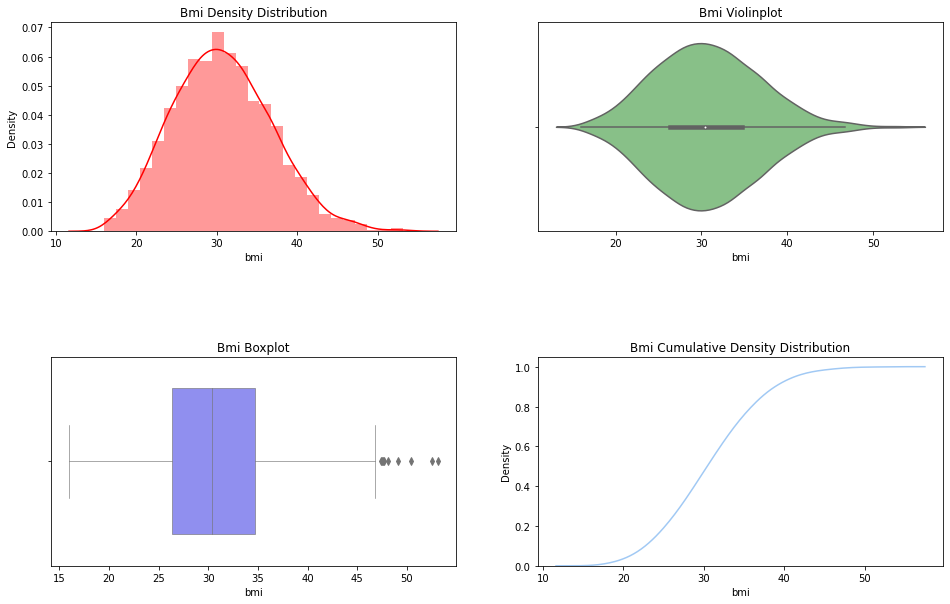

In [19]:
summary('bmi')

5 Point Summary of Charges Attribute:
Charges(min) : 1121.8739
Q1                    : 4740.28715
Q2(Median)            : 9382.033
Q3                    : 16639.912515
Charges(max) : 63770.42801


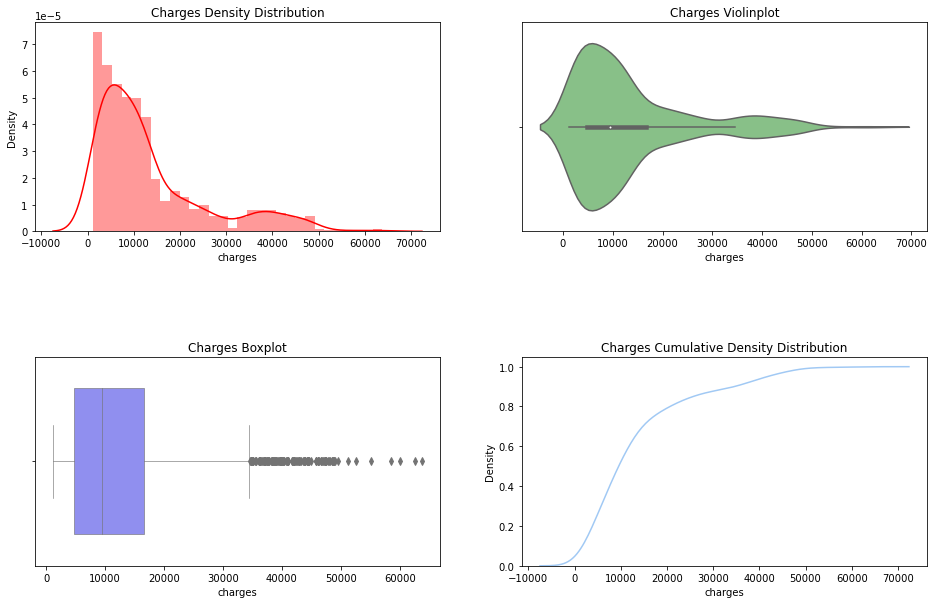

In [20]:
summary('charges')

5 Point Summary of Children Attribute:
Children(min) : 0
Q1                    : 0.0
Q2(Median)            : 1.0
Q3                    : 2.0
Children(max) : 5


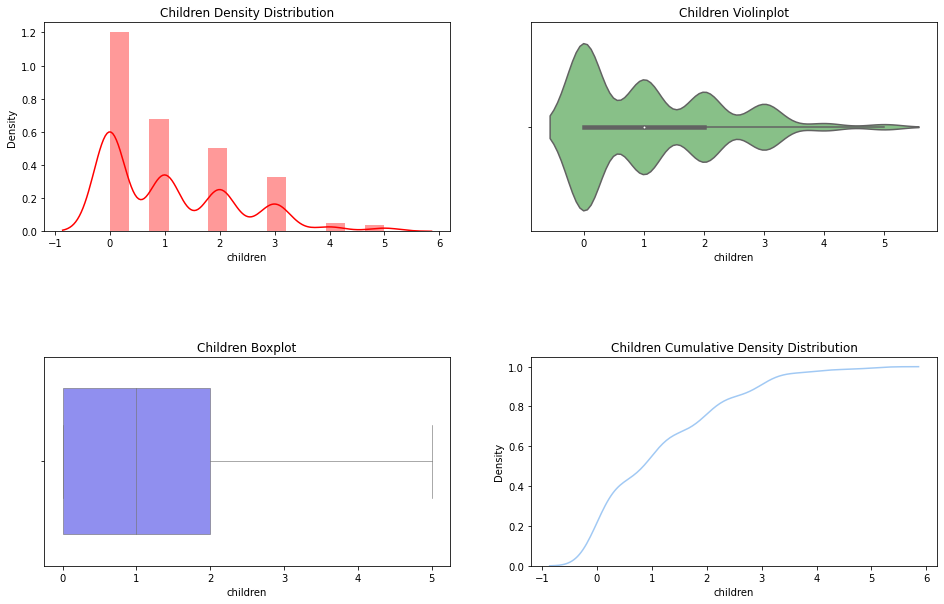

In [21]:
summary('children')

In [22]:
cat_cols = data_ins.select_dtypes(include = 'object')
num_cols =data_ins.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Categorical Columns are :  Index(['sex', 'smoker', 'region'], dtype='object')


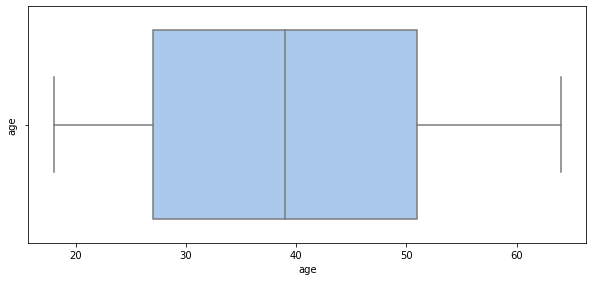

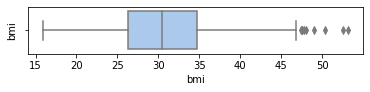

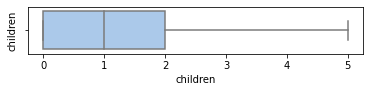

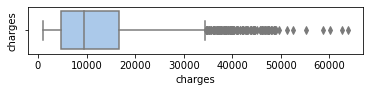

In [23]:
plt.figure(figsize=(10,20))
for i,col in enumerate(num_cols,1):
        plt.subplot(4,1,i)
        sns.boxplot(data_ins[col])
        plt.ylabel(col)
        plt.show()

In [24]:
mean=data_ins['bmi'].mean()
std=data_ins['bmi'].std()
threshold = 3
outlier = [] 
for i in data_ins['bmi']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

outlier in dataset is [49.06, 50.38, 52.58, 53.13]


<AxesSubplot:xlabel='sex', ylabel='count'>

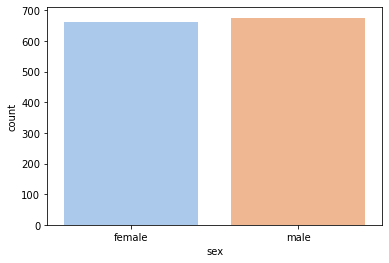

In [25]:

sns.countplot(x=data_ins['sex'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

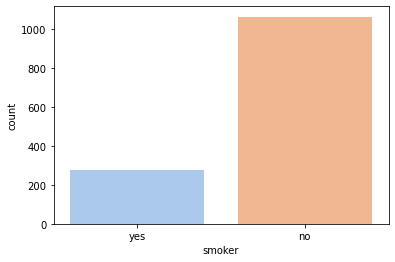

In [26]:

sns.countplot(x=data_ins['smoker'])

<AxesSubplot:xlabel='region', ylabel='count'>

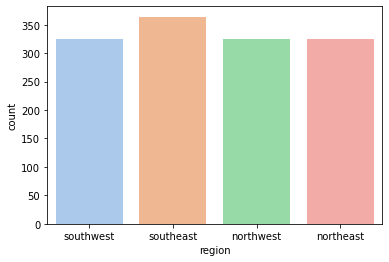

In [27]:
sns.countplot(x=data_ins['region'])

<AxesSubplot:xlabel='children', ylabel='count'>

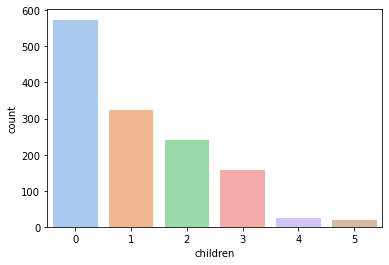

In [28]:
sns.countplot(x=data_ins['children'])

In [29]:
import plotly.express as px
pie = data_ins["region"].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(data_ins, values=population, names=regions)
fig.show()

In [30]:
data_ins = data_ins
figure = px.histogram(data_ins, x = "sex", color = "smoker", title= "Number of Smokers")
figure.show()

In [31]:
## Replacing string values to numbers
repval = {'sex':{'male':0, 'female':1},
          'region':{'southwest':1, 'southeast':2,'northwest':3,'northeast':4},
          'smoker':{'yes':1, 'no':0}
         }


# copy dataframe to avoid overwrite original data
data = data_ins.copy()
data.replace(repval, inplace=True)

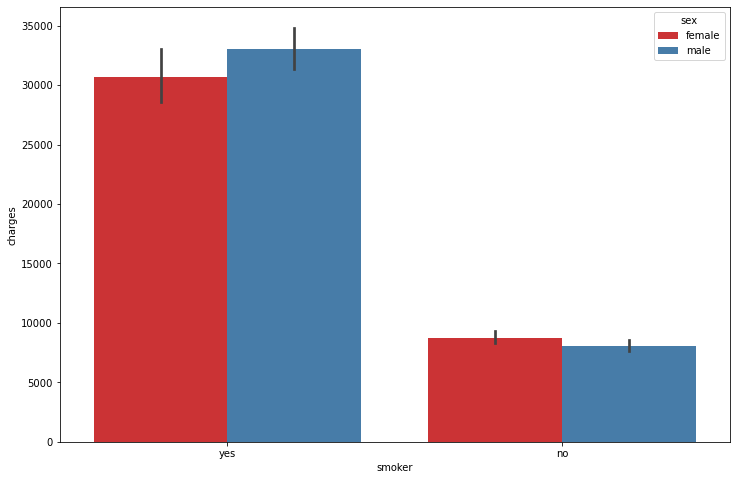

In [32]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='smoker', y='charges', hue='sex', data=data_ins, palette='Set1')

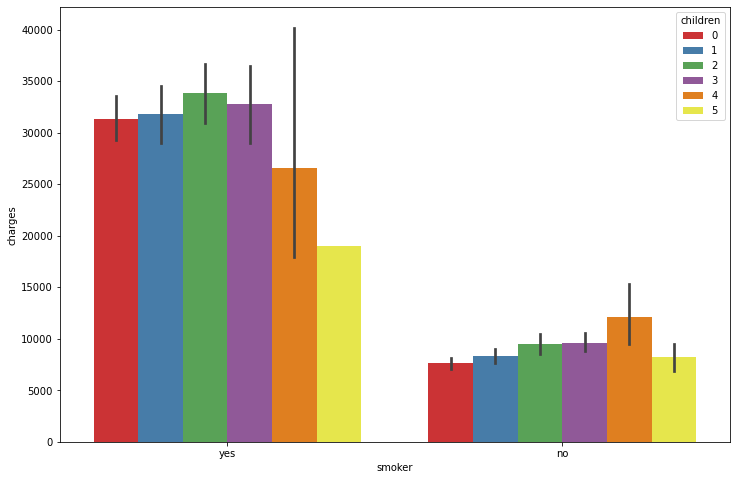

In [33]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='smoker', y='charges', hue='children', data=data_ins, palette='Set1')

In [34]:
data.head()

age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       1  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       3  21984.47061
4   32    0  28.880         0       0       3   3866.85520

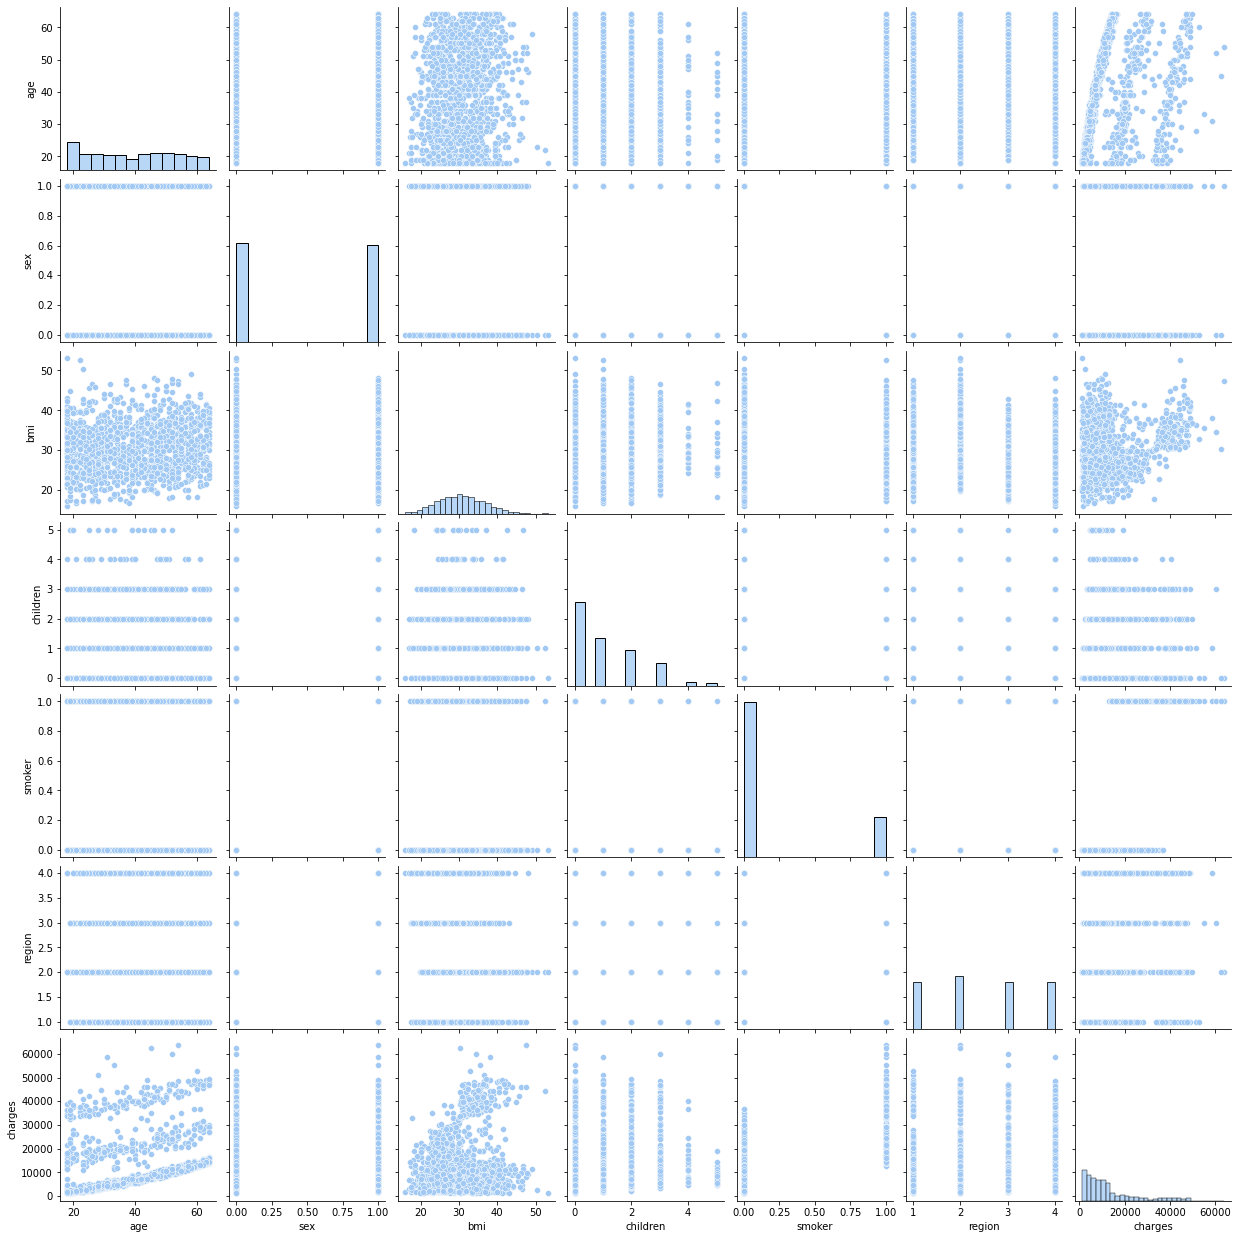

In [35]:
sns.pairplot(data)  #pairplot
plt.show()

In [36]:
corr = data.corr()
corr

age       sex       bmi  children    smoker    region   charges
age       1.000000  0.020856  0.109272  0.042469 -0.025019 -0.002127  0.299008
sex       0.020856  1.000000 -0.046371 -0.017163 -0.076185  0.004588 -0.057292
bmi       0.109272 -0.046371  1.000000  0.012759  0.003750 -0.157566  0.198341
children  0.042469 -0.017163  0.012759  1.000000  0.007673 -0.016569  0.067998
smoker   -0.025019 -0.076185  0.003750  0.007673  1.000000  0.002181  0.787251
region   -0.002127  0.004588 -0.157566 -0.016569  0.002181  1.000000  0.006208
charges   0.299008 -0.057292  0.198341  0.067998  0.787251  0.006208  1.000000

<AxesSubplot:>

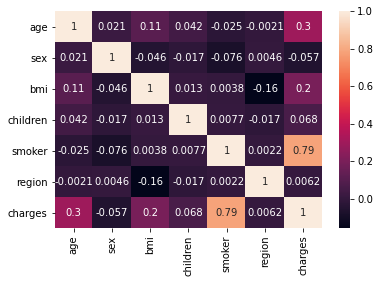

In [37]:
sns.heatmap(corr, annot=True)

#### Summary:

Top 4 Correlated features:
- Smoker
- age
- bmi
- children

Do charges of people who smoke differ significantly from the people who don't?¶


In [38]:
data.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

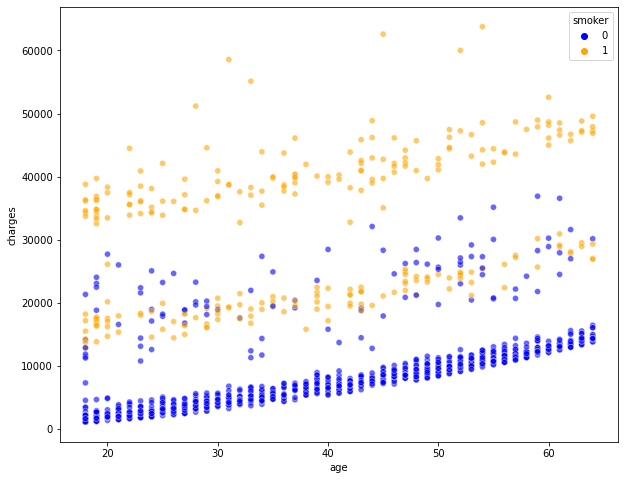

In [39]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(10,8))
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['blue','orange'] ,alpha=0.6)
plt.show()

Does bmi of males differ significantly from that of females?

In [40]:
data.sex.value_counts()   #Checking the distribution of males and females

0    676
1    662
Name: sex, dtype: int64

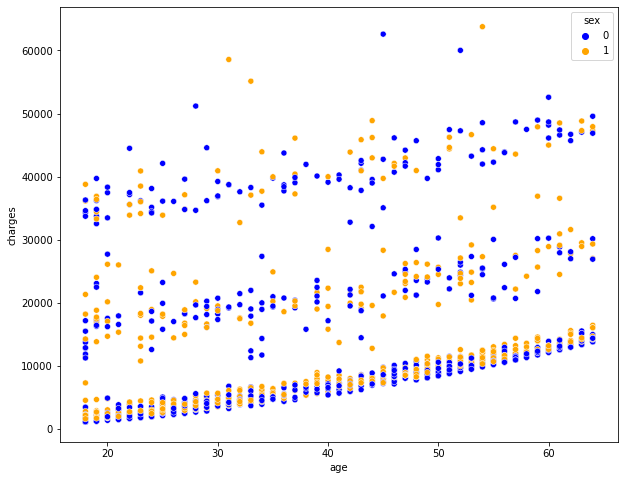

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(data.age, data.charges,hue=data.sex,palette= ['blue','orange'] )
plt.show()

<a id="project-four-part-three"></a>
## PROJECT 4 - PART 3 - GA TRAINING 

<a id="title-ml"></a>
## TITLE: MACHINE LEARNING IN PREDICTING INSURANCE MEDICAL CHARGES

<a id="dataset-overview2"></a>
#### DATASET OVERVIEW

Inside the dataset, there are several attributes that can be a factor that affecting the cost of medical insurance. The attributes are:

Age: Age of primary beneficiary

Sex: Sex/gender of the beneficiary

BMI: Body Mass Index (BMI) of beneficiary; providing information of body in term of relationship between height and weight of a person

Children: Number of the dependents covered by medical insurance

Smoker: Status of beneficiary; smoker or non-smoker

Region: Beneficiaries residential area in US; northeast, southeast, southwest, northwest.

Charges: Individual medical cost billed by medical insurance

The dataset was taken from https://www.kaggle.com/mirichoi0218/insurance

<a id="bias-variance"></a>
#### BIAS AND VARIANCE

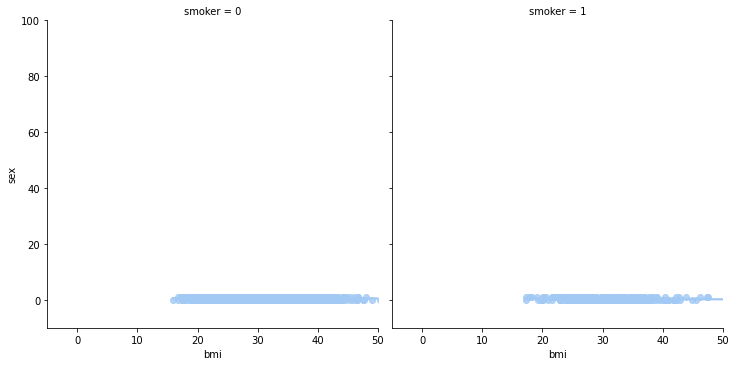

In [42]:
# col='universe' subsets the data by universe and creates two separate plots.
sns.lmplot(x='bmi', y='sex', data=data, ci=None, col='smoker');
plt.xlim(-5, 50);
plt.ylim(-10, 100);

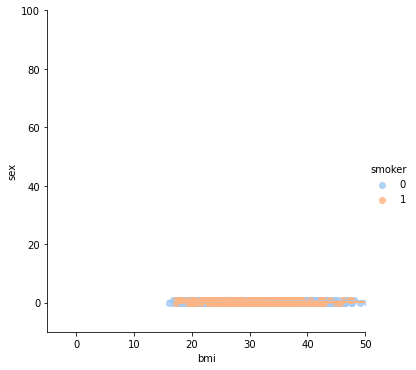

In [43]:
# hue='universe' subsets the data by universe and creates a single plot.
sns.lmplot(x='bmi', y='sex', data=data, ci=None, hue='smoker');
plt.xlim(-5, 50);
plt.ylim(-10, 100);

#### Summary

It's low bias because it fits the data particularly well.
It's low variance because it doesn't change much depending on which observations happen to be available in that smoker status.

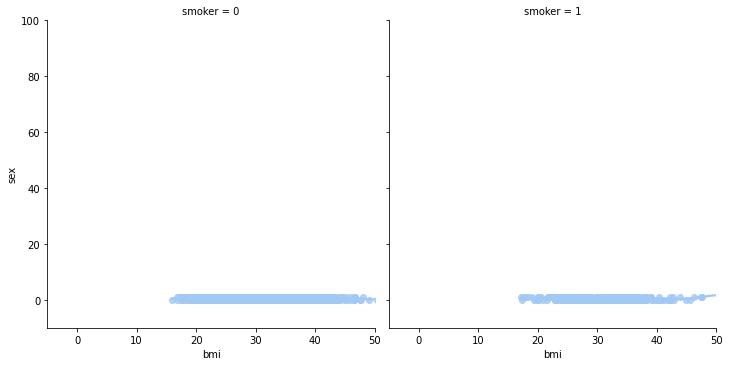

In [44]:
sns.lmplot(x='bmi', y='sex', data=data, ci=None, col='smoker', order=8);
plt.xlim(-5, 50);
plt.ylim(-10, 100);

#### Summary

The line looks pretty similar between the two plots, despite the fact that they used separate samples of data.

<a id="evaluation-procedure"></a>
#### EVALUATION PROCEDURE

In [46]:
data = pd.read_csv('insurance.csv')
data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [47]:
#check information about the dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
#produce First 5 rows.

data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [49]:
#produce Last 5 rows.

data.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [50]:
#check for missing values in any column(s)

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
#detailed description of the dataset 

data.describe(include='all')

age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422265  
std     12110.011237  
min      1121.873900  
25%      4740.287150  
50%      9382.033000  
75%     16639.912515  
max     63770.428010

In [52]:
data.shape

(1338, 7)

<a id="dataset-visualisation2"></a>
#### DATA VISUALIZATION

In [53]:
np.random.lognormal(size=1337)

array([0.77197844, 0.38061936, 2.68797983, ..., 5.49177766, 0.39289057,
       0.09385281])

(array([440., 341., 165., 122.,  69.,  60.,  29.,  20.,  18.,  13.,  14.,
         10.,   5.,   5.,   4.,   1.,   3.,   4.,   1.,   1.,   3.,   2.,
          2.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 0.03317036,  0.64900969,  1.26484902,  1.88068835,  2.49652768,
         3.11236701,  3.72820634,  4.34404567,  4.959885  ,  5.57572433,
         6.19156366,  6.80740299,  7.42324232,  8.03908165,  8.65492098,
         9.27076031,  9.88659964, 10.50243897, 11.1182783 , 11.73411763,
        12.34995696, 12.96579629, 13.58163562, 14.19747495, 14.81331428,
        15.42915361, 16.04499294, 16.66083227, 17.2766716 , 17.89251093,
        18.50835026, 19.12418959, 19.74002892, 20.35586825, 20.97170759,
        21.58754692, 22.20338625, 22.81922558, 23.43506491, 24.05090424,
        24.66674357, 25.2825829 , 25.89842223, 26.51426156, 27.13010089,
 

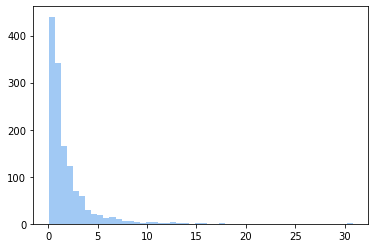

In [54]:
plt.hist(np.random.lognormal(size=1337), bins = 50)

Text(0.5, 1.0, 'Distribution of Charges')

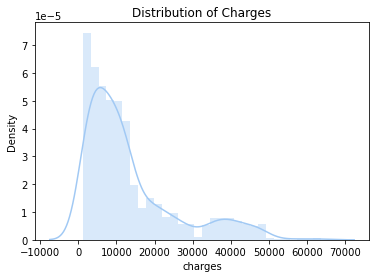

In [55]:
# Distribution of Charges

sns.distplot(data['charges'])
plt.title('Distribution of Charges')

<a id="distribution-iv"></a>
#### DISTRIBUTION OF INDEPENDENT VARIABLE

Text(0.5, 1.0, 'Distribution of Charges')

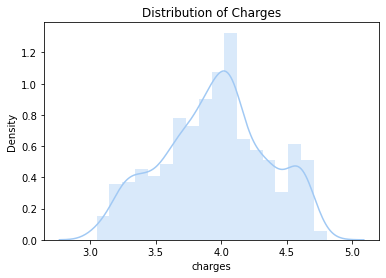

In [56]:
# Normalize Distribution of Charges using Natural Logarithm

sns.distplot(np.log10(data['charges']))
plt.title('Distribution of Charges')

<a id="finding-iv"></a>
#### FINDING INDEPENDENT VARIABLE

In [57]:
## Replacing string values to numbers
repval = {'sex':{'male':0, 'female':1},
          'region':{'southwest':1, 'southeast':2,'northwest':3,'northeast':4},
          'smoker':{'yes':1, 'no':0}
         }

In [58]:
data = data.replace(repval)
data.head()

age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       1  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       3  21984.47061
4   32    0  28.880         0       0       3   3866.85520

##### Gender against Charges

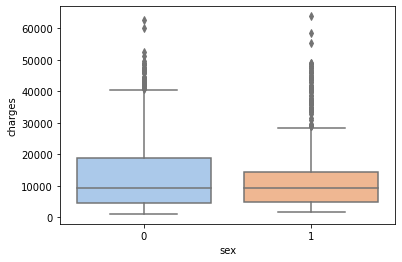

In [59]:
sns.boxplot(x = data['sex'], y = data['charges'])
plt.show()
#Both 

#### No. of Children against Charges

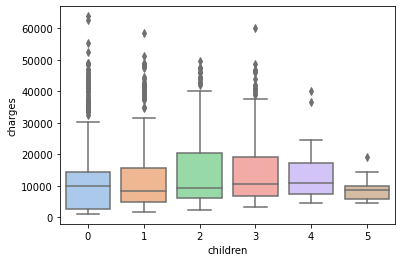

In [60]:
sns.boxplot(x = data['children'], y = data['charges'])
plt.show()

#### Smoker against Charges

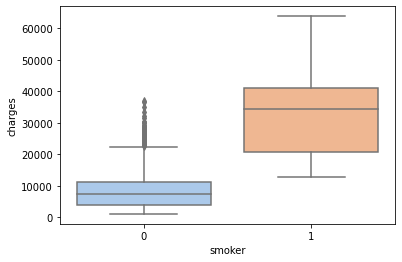

In [61]:
sns.boxplot(x = data['smoker'], y = data['charges'])
plt.show()

#### Region against Charges

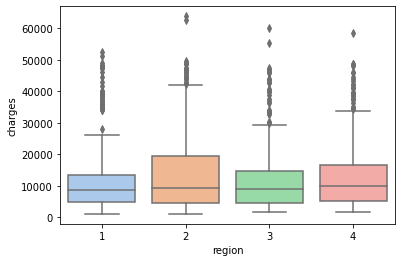

In [62]:
sns.boxplot(x = data['region'], y = data['charges'])
plt.show()

#### Covariance between Variables

From the boxplots above, there are few insights that can be retrieved:

Sex, Region, and Gender do not have much impact on medical insurance charges.
Those who are smoking does impact the medical insurance charges.
Those who have none and one dependent impacted less than those who have two or more dependents. However, those with five dependents show a smaller impact than others.
From here, we can deduce that Smokers, No. of Dependent, Age, and BMI are the independent variables to predict the medical insurance cost.

In [63]:
#Answer
data.mean()

age            39.207025
sex             0.494768
bmi            30.663397
children        1.094918
smoker          0.204783
region          2.484305
charges     13270.422265
dtype: float64

In [64]:
data.cov()

age         sex           bmi    children       smoker  \
age         197.401387    0.146559      9.362337    0.719303    -0.141903   
sex           0.146559    0.250160     -0.141435   -0.010348    -0.015383   
bmi           9.362337   -0.141435     37.187884    0.093795     0.009233   
children      0.719303   -0.010348      0.093795    1.453213     0.003734   
smoker       -0.141903   -0.015383      0.009233    0.003734     0.162969   
region       -0.033024    0.002536     -1.061646   -0.022069     0.000973   
charges   50874.802298 -347.014469  14647.304426  992.674197  3848.667032   

             region       charges  
age       -0.033024  5.087480e+04  
sex        0.002536 -3.470145e+02  
bmi       -1.061646  1.464730e+04  
children  -0.022069  9.926742e+02  
smoker     0.000973  3.848667e+03  
region     1.220771  8.306723e+01  
charges   83.067231  1.466524e+08

#### Correlation between Variables

In [65]:
data_corr = data.corr()
data_corr

age       sex       bmi  children    smoker    region   charges
age       1.000000  0.020856  0.109272  0.042469 -0.025019 -0.002127  0.299008
sex       0.020856  1.000000 -0.046371 -0.017163 -0.076185  0.004588 -0.057292
bmi       0.109272 -0.046371  1.000000  0.012759  0.003750 -0.157566  0.198341
children  0.042469 -0.017163  0.012759  1.000000  0.007673 -0.016569  0.067998
smoker   -0.025019 -0.076185  0.003750  0.007673  1.000000  0.002181  0.787251
region   -0.002127  0.004588 -0.157566 -0.016569  0.002181  1.000000  0.006208
charges   0.299008 -0.057292  0.198341  0.067998  0.787251  0.006208  1.000000

In [66]:
#The increase 1 unit of age will increase 0.299008 of charges (statistical explaination)

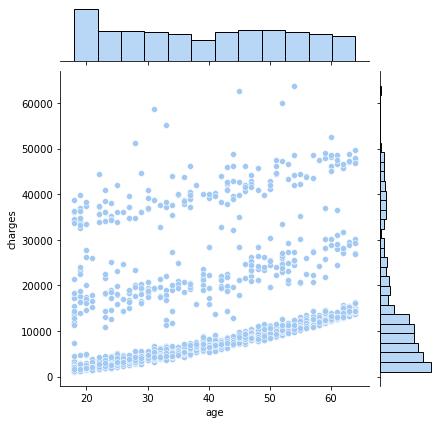

In [67]:
# Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=data['age'],y=data['charges'])

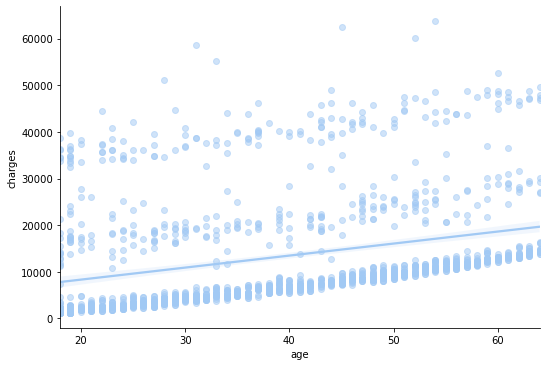

In [68]:
# Seaborn scatterplot with regression line
sns.lmplot(x='age', y='charges', data=data, aspect=1.5, scatter_kws={'alpha':0.5});

#### Summary
As the Age goes up, Charges for health insurance increasing

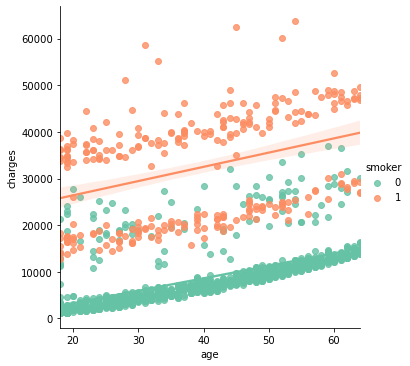

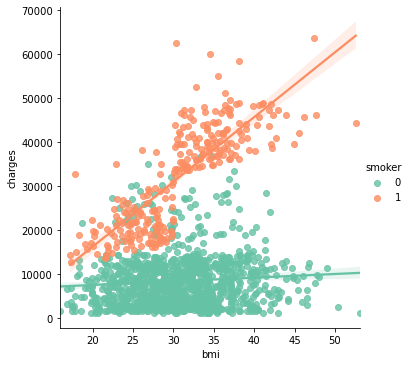

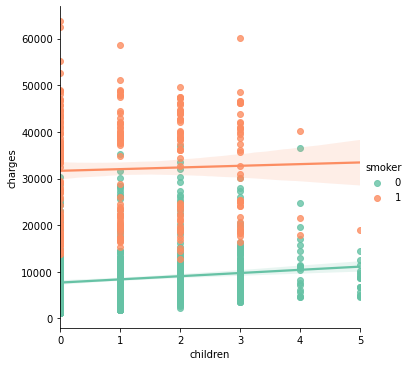

In [69]:
ax = sns.lmplot(x = 'age', y = 'charges', data=data, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=data, hue='smoker', palette='Set2')

#### Summary: 
As the Age goes up, Charges for health insurance increasing

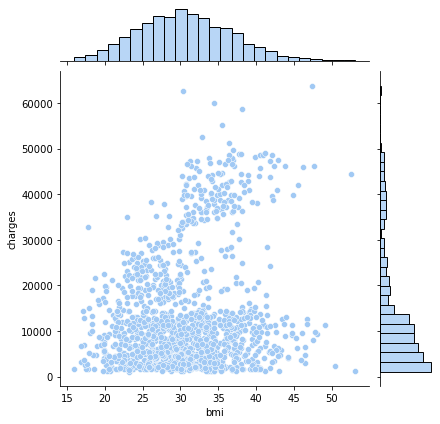

In [70]:
# Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=data['bmi'],y=data['charges'])

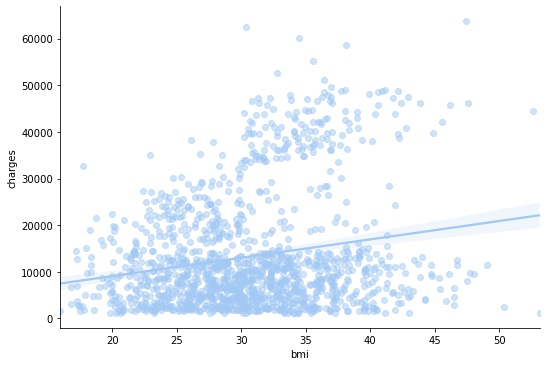

In [71]:
# Seaborn scatterplot with regression line
sns.lmplot(x='bmi', y='charges', data=data, aspect=1.5, scatter_kws={'alpha':0.5});

#### Summary:
As the Age goes up, Charges for health insurance increasing

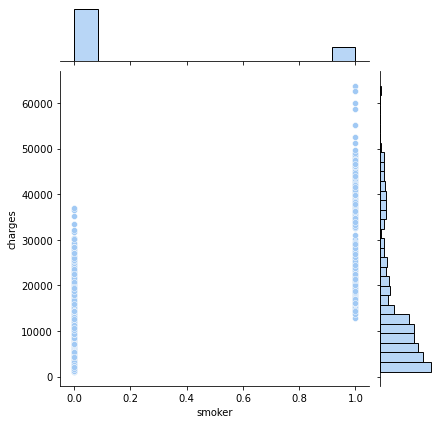

In [72]:
# Correlation betweeen 'charges' and 'age' 
# smoker = 1 , non-smoker = 0
sns.jointplot(x=data['smoker'],y=data['charges'])

#### Summary
charges for smokers are higher than non-smokers

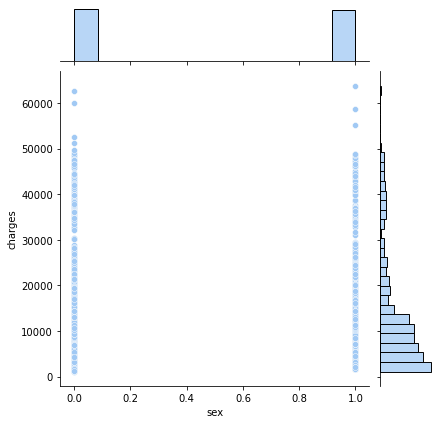

In [73]:
# Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=data['sex'],y=data['charges'])

<AxesSubplot:>

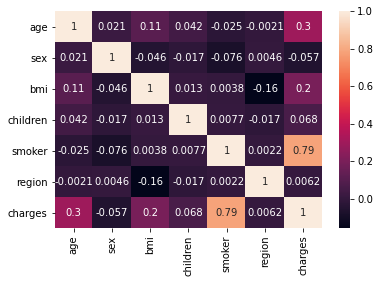

In [74]:
sns.heatmap(data_corr, annot=True)

<a id="ml-model"></a>
### MACHINE LEARNING MODEL

#### Features Preparation

In [75]:
#create a list of features/variables

feat_cols = ['age','smoker','children','bmi']

In [76]:
# Prepare a feature matrix (X) and response (y) for scikit-learn.

# Create feature matrix (X)
X = data[feat_cols]

# Create response vector (y)
Y = data['charges']

In [77]:
#check shapes of X and Y

X.shape, Y.shape

((1338, 4), (1338,))

#### Feature Selection
#### Data Split (Train-Test-Split)

In [78]:
#import related librar(ies)

from sklearn.model_selection import train_test_split

In [106]:
#Define data split (80:20 ratio)
#Train/Test is a method to measure the accuracy of your model.
#It is called Train/Test because you split the the data set into two sets: a training set and a testing set.
#70% for training, and 30% for testing.
#Train the model means create the model.
#model = linear regresison model
#Test the model means test the accuracy of the model.

#Split Into Train/Test
#The training set should be a random selection of 80% of the original data.
#The testing set should be the remaining 20%.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 30)

In [80]:
#check shape before and after splitting 

print("Before split: ",X.shape,",", Y.shape)
print("After split [Train]: ",X_train.shape,",", Y_train.shape)
print("After split [Test]: ",X_test.shape,",", Y_test.shape)
(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

Before split:  (1338, 4) , (1338,)
After split [Train]:  (1070, 4) , (1070,)
After split [Test]:  (268, 4) , (268,)


((1070, 4), (1070,), (268, 4), (268,))

<a id="linreg-model"></a>
### LINEAR REGRESSION MODEL

In [81]:
#import related librar(ies)
from sklearn.linear_model import LinearRegression 

# Instantiate the model.
linreg = LinearRegression()

In [82]:
#train the dataset using the LR model 
# plot training dataset and build best linear regression fit line
linreg.fit(X_train, Y_train)

LinearRegression()

In [83]:
#apply trained model to make prediction on test set

Y_pred = linreg.predict(X_test)

In [84]:
# y = mx + c
# Our model(linear regression) is 74.15% accurate. Therefore, we can proceed with further analysis.
print(linreg.intercept_)
print(linreg.coef_)
print(linreg.score(X_test,Y_test))

-12107.678845236489
[  267.52141139 23635.48654945   413.18844393   311.51627695]
0.7612151089549922


In [85]:
# group items into a single tuple
list(zip(feat_cols, linreg.coef_))

[('age', 267.52141138916596),
 ('smoker', 23635.48654945026),
 ('children', 413.18844393486734),
 ('bmi', 311.51627694542185)]

Interpreting the coefficients:

Holding all other features fixed, a 1-unit increase in age is associated with cost increase of 256.043 medical insurance charge.

Holding all other features fixed, a 1-unit increase in smoker is associated with cost increase of 23784.355 medical insurance charge.

Holding all other features fixed, a 1-unit increase in children is associated with cost of 541.906 medical insurance charge.

Holding all other features fixed, a 1-unit increase in bmi is associated with cost of 325.879 medical insurance charge.

In [86]:
#  standard scaling
#  ML algorithm works better when features are relatively on a similar scale and close to Normal Distribution. 
# SCALE - It means to change the range of values but without changing the shape of distribution. Range is often set to 0 to 1.
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
linreg = LinearRegression()

# feeding the training data to the model
linreg.fit(X_train, Y_train)

# predicting the test set results
y_pred = linreg.predict(X_test)

# calculating the mean squared error
mse = np.mean((Y_test - Y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(Y_test, Y_pred)
print("r2 score :", r2)

MSE : 36833293.75507092
RMSE : 6069.043891344906
r2 score : 0.7612151089549922


In [88]:
Y_test

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64

In [89]:
Y_pred

array([35379.04246294,  6112.76303646,  6110.85010254, 26448.95641647,
       13236.0819109 ,  6779.02528234,  4900.45363941,  9996.37897681,
       33479.14852611, 11607.28883775,  8245.55624168, 10439.81350428,
       35375.08810216, 11749.3840963 ,  1585.92045271, 35810.9372401 ,
       12171.8440041 ,  9457.85796043, 29025.22326106, 11116.18641203,
        1646.28353993,  8913.36839065,  7953.14844069, 11087.74012608,
       33504.4796493 , 39226.01438938, 14734.99816038,  3646.7095617 ,
       11228.75397042, 14585.80614404,  2007.33385885, 31171.13335393,
        1680.57756465, 14820.18896936, 12946.42624184,  9186.37450996,
        2219.88331055,  7203.91688208,   936.0264285 ,  8543.39008275,
        7129.64102045, 33989.39086138,  2748.313221  , 14269.57801104,
       10513.39473785, 30591.56502992,  5623.72927185,  3330.41160361,
        3071.54453141,  5376.40194997, 11351.46710322, 13176.16775661,
       12242.78204272,  1620.21447743, 11244.32978426,  7709.45923895,
      

In [90]:
Y_pred

array([35379.04246294,  6112.76303646,  6110.85010254, 26448.95641647,
       13236.0819109 ,  6779.02528234,  4900.45363941,  9996.37897681,
       33479.14852611, 11607.28883775,  8245.55624168, 10439.81350428,
       35375.08810216, 11749.3840963 ,  1585.92045271, 35810.9372401 ,
       12171.8440041 ,  9457.85796043, 29025.22326106, 11116.18641203,
        1646.28353993,  8913.36839065,  7953.14844069, 11087.74012608,
       33504.4796493 , 39226.01438938, 14734.99816038,  3646.7095617 ,
       11228.75397042, 14585.80614404,  2007.33385885, 31171.13335393,
        1680.57756465, 14820.18896936, 12946.42624184,  9186.37450996,
        2219.88331055,  7203.91688208,   936.0264285 ,  8543.39008275,
        7129.64102045, 33989.39086138,  2748.313221  , 14269.57801104,
       10513.39473785, 30591.56502992,  5623.72927185,  3330.41160361,
        3071.54453141,  5376.40194997, 11351.46710322, 13176.16775661,
       12242.78204272,  1620.21447743, 11244.32978426,  7709.45923895,
      

<a id="forest-model"></a>
#### RANDOM FOREST MODEL



In [91]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
linreg = RandomForestRegressor(n_estimators = 100,criterion = 'mse',random_state = 1, n_jobs = -1)

#n_jobs=None: Use a single core or the default configured by your backend library.
#n_jobs=4: Use the specified number of cores, in this case 4.
#n_jobs=-1: Use all available cores.

# feeding the training data to the model
linreg.fit(X_train, Y_train)

# predicting the test set results
Y_pred = linreg.predict(X_test)

# calculating the mean squared error
mse = np.mean((Y_test - Y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(Y_test, Y_pred)
print("r2 score :", r2)

MSE : 26223507.705914505
RMSE : 5120.889347165637
r2 score : 0.8299968101681744


In [92]:
Y_test

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64

In [93]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [94]:
np.array(X_test)[0]

array([ 0.67555426,  1.94569121, -0.03048044,  0.25126066])

In [95]:
X.columns

Index(['age', 'smoker', 'children', 'bmi'], dtype='object')

As we can see, the sample can be described as follows:

Age = 23 years old

Sex = 0 (Female, 0 -> Female, 1 -> Male)

BMI = 26.695

No. of Children = 0

Smoker = 0 (Doesn't smoke, 0 -> Doesn't Smoke, 1 -> Smokes)

Let us predict the medical cost for this sample data

In [96]:
sample = np.array(X_test)[0]
sample

array([ 0.67555426,  1.94569121, -0.03048044,  0.25126066])

In [97]:
sample.shape

(4,)

In [98]:
sample = sample.reshape(-1,4)

In [99]:
sample

array([[ 0.67555426,  1.94569121, -0.03048044,  0.25126066]])

In [100]:
prediction = linreg.predict(sample)

In [101]:
print(f"Predicted Value:{np.round(prediction[0],3)}, Actual Value:{np.round(np.array(Y_test)[0],3)}")


Predicted Value:41301.227, Actual Value:41919.097


Predicted Value:41301.227, Actual Value:41919.097

We can see the that the model is not extremely accurate, but it is close enough to get a rough estimate about the medical cost that may incur.

Instead of a sample from the, let us give the model some custom data and feed it some random values to see the interesting prediction:

In [102]:
#'age', 'smoker', 'children', 'bmi'
my_data = [21, 0, 4, 24]

In [103]:
my_data = np.array(my_data)
my_data

array([21,  0,  4, 24])

In [104]:
my_data = my_data.reshape(-1,4)
my_data

array([[21,  0,  4, 24]])

In [105]:
prediction = linreg.predict(my_data)
print(f'Estimated Medical Cost:{prediction[0]}')

Estimated Medical Cost:25463.18720119998


#### Summary

Performance:
- Linear Regression : 76.12%
- Random Forest : 83.00 %

- The results shows  that Random forest model offers the best efficiency, with an RMSE value of 5120.889,  an  MSE  value of 
- 26223507.706,  and an  accuracy of 83.00% in comparison with Linear regression model with RMSE of 6069.044, MSE value of, 36833293.755, and an accuracy of 76.12%.

- Therefore, Random Forest Model can be used in the estimation of insurance cost with better performance than linear regression model. 

- Predicting/forecasting insurance costs based on certain  factors  help  insurance  policy  providers  to  attract consumers  and  save  time  in  formulating  plans  for  every individual. 

- Machine learning can significantly minimize these individual efforts in policymaking.

- ML models can do cost calculation in  a short period of time, while a human being would be taking a long time to perform the same task. This will help businesses improve their profitability.  The ML models can also manage enormous amounts of data.